In [272]:
import numpy as np
import matplotlib.pyplot as plt

In [273]:
def runge_kutta_method(f, g, l, r, h, y0, z0):
    n = int((r - l) / h) + 1
    x = [0] * n
    y = [0] * n
    z = [0] * n
    x[0] = l
    y[0] = y0
    z[0] = z0
    
    for i in range(n-1):
        K1 = h * f(x[i], y[i], z[i])
        L1 = h * g(x[i], y[i], z[i])
        K2 = h * f(x[i] + h / 2, y[i] + K1 / 2, z[i] + L1 / 2)
        L2 = h * g(x[i] + h / 2, y[i] + K1 / 2, z[i] + L1 / 2)
        K3 = h * f(x[i] + h / 2, y[i] + K2 / 2, z[i] + L2 / 2)
        L3 = h * g(x[i] + h / 2, y[i] + K2 / 2, z[i] + L2 / 2)
        K4 = h * f(x[i] + h, y[i] + K3, z[i] + L3)
        L4 = h * g(x[i] + h, y[i] + K3, z[i] + L3)
        dy = (K1 + 2 * K2 + 2 * K3 + K4) / 6
        dz = (L1 + 2 * L2 + 2 * L3 + L4) / 6
        x[i + 1] = x[i] + h
        y[i + 1] = y[i] + dy
        z[i + 1] = z[i] + dz

    return x, y, z

In [274]:
def runge_romberg(y1, y2, k, p):
    res = 0
    c = 1 / (k ** p + 1)

    for i in range(len(y1)):
        res = max(res, c * abs(y1[i] - y2[i*k]))

    return res

In [275]:
def max_abs_error(y1, y2):
    res = 0

    for i in range(len(y1)):
        res = max(res, abs(y1[i] - y2[i]))

    return res

In [276]:
def tridiagonal_solve(a, b, c, d) -> np.ndarray:
    n = len(d)
    p = np.ndarray(n, dtype=float)
    q = np.ndarray(n, dtype=float)
    x = np.ndarray(n, dtype=float)

    p[0] = -c[0] / b[0]
    q[0] = d[0] / b[0]

    for i in range(1, n):
        p[i] = -c[i] / (b[i] + a[i]*p[i-1])
        q[i] = (d[i] - a[i]*q[i-1]) / (b[i] + a[i]*p[i-1])

    x[-1] = q[-1]

    for i in range(n-2, -1, -1):
        x[i] = p[i] * x[i+1] + q[i]

    return x

In [277]:
def shooting_method(f, g, a, b, h, alpha, beta, delta, gamma, y0, y1, eta0, eta1, eps):
    def get_z0(eta):
        return (y0 - alpha * eta) / beta

    while True:
        _, y_s0, z_s0 = runge_kutta_method(f, g, a, b, h, eta0, get_z0(eta0))
        x_s1, y_s1, z_s1 = runge_kutta_method(f, g, a, b, h, eta1, get_z0(eta1))

        phi0 = delta * y_s0[-1] + gamma * z_s0[-1] - y1
        phi1 = delta * y_s1[-1] + gamma * z_s1[-1] - y1

        eta2 = eta1 - (eta1 - eta0) / (phi1 - phi0) * phi1

        if abs(eta2 - eta1) < eps:
            return x_s1, y_s1, z_s1

        eta0, eta1 = eta1, eta2

In [278]:
def finite_difference_method(f, p, q, l, r, h, alpha, beta, delta, gamma, y0_, y1_):
    n = int((r - l) / h)
    xk = [l + h * i for i in range(n+1)]
    a, b, c, d = [0]*(n+1), [0]*(n+1), [0]*(n+1), [0]*(n+1)

    b[0] = h * alpha - beta
    c[0] = beta
    d[0] = h * y0_
    a[-1] = -gamma
    b[-1] = h * delta + gamma
    d[-1] = h * y1_

    for i in range(1, n):
        if xk[i] == 0:
            a[i] = 1
            b[i] = -2 + h**2 * q(xk[i])
            c[i] = 1
        else:
            a[i] = 1 - p(xk[i]) * h / 2
            b[i] = -2 + h**2 * q(xk[i])
            c[i] = 1 + p(xk[i]) * h / 2
        d[i] = h**2 * f(xk[i])

    yk = tridiagonal_solve(a, b, c, d)
    return xk, yk

In [279]:
f = lambda x, y, z: z
fx = lambda x: 0

In [280]:
g = lambda x, y, z: ((2 * x + 1) * z - (x + 1) * y) / x if x != 0 else 0
p = lambda x: (-(2 * x + 1) / x) if x != 0 else 0
q = lambda x: ((x + 1) / x) if x != 0 else 0
real_f = lambda x: np.exp(x) * (x ** 2 + 1) 

In [281]:
a = 0
b = 1
alpha = 0
beta = 1
delta = -2
gamma = 1
y0 = 1
y1 = 0
h = 0.005
eps = 1e-9
eta0 = 1
eta1 = 0.8

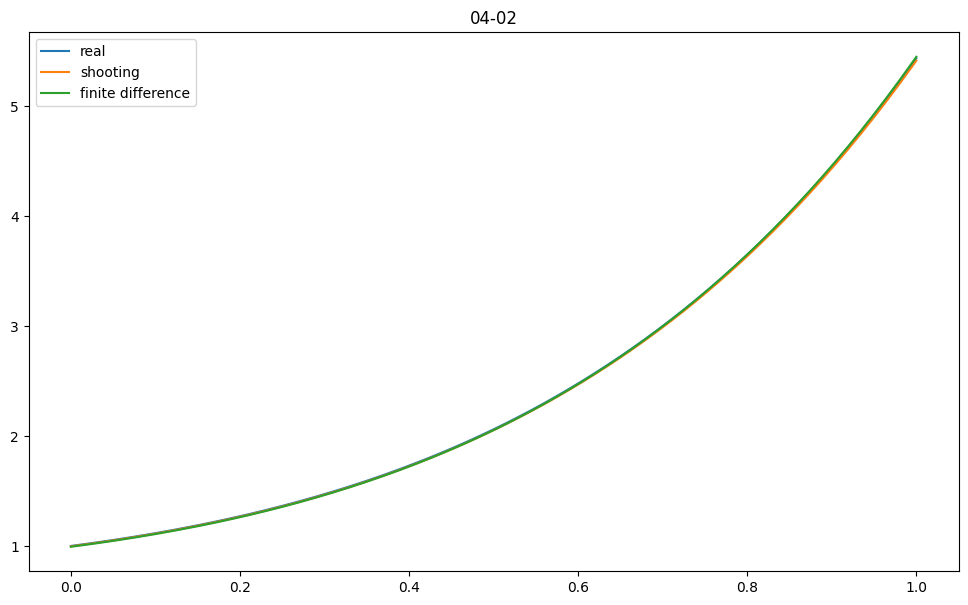

In [282]:
real_x = [a+i*h for i in range(int((b-a)/h)+1)]
real_y = list(map(real_f, real_x))

shooting_x1, shooting_y1, _ = shooting_method(f, g, a, b, h, alpha, beta, delta, gamma, y0, y1, eta0, eta1, eps)
_, shooting_y2, _ = shooting_method(f, g, a, b, h/2, alpha, beta, delta, gamma, y0, y1, eta0, eta1, eps)

finite_diff_x1, finite_diff_y1 = finite_difference_method(fx, p, q, a, b, h, alpha, beta, delta, gamma, y0, y1)
_, finite_diff_y2 = finite_difference_method(fx, p, q, a, b, h/2, alpha, beta, delta, gamma, y0, y1)

shooting_er_rr = runge_romberg(shooting_y1, shooting_y2, 2, 4)
finite_diff_er_rr = runge_romberg(finite_diff_y1, finite_diff_y2, 2, 4)

shooting_er_ma = max_abs_error(shooting_y1, real_y)
finite_diff_er_ma = max_abs_error(finite_diff_y1, real_y)
    
plt.figure(figsize=(12, 7))
plt.plot(real_x, real_y, label="real")
plt.plot(shooting_x1, shooting_y1, label="shooting")
plt.plot(finite_diff_x1, finite_diff_y1, label="finite difference")
plt.title('04-02')
plt.legend()
plt.show()

In [283]:
print("Runge Romberg:\n")
print(f"Shooting: {shooting_er_rr}\n")
print(f"Finite difference: {finite_diff_er_rr}\n")
print("Exact:\n")
print(f"Shooting: {shooting_er_ma}\n")
print(f"Finite difference: {finite_diff_er_ma}\n")

Runge Romberg:

Shooting: 0.0006240431530051663

Finite difference: 0.0003978964229278942

Exact:

Shooting: 0.02123613002227831

Finite difference: 0.013548846174358253

